In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
import keras.models

Using TensorFlow backend.


In [3]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Add, Flatten, MaxPooling2D, AveragePooling2D, Activation, Input, BatchNormalization, Dropout
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 

In [4]:
import keras.optimizers

In [5]:
from keras.models import Model
!pip install livelossplot

In [6]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
train.describe()
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
data = train.iloc[:,:].values
print(data.shape)
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)
Xt = tf.convert_to_tensor(X)
Yt=tf.convert_to_tensor(Y)

(42000, 785)
(42000, 784) (42000,)


In [8]:
print(Y)

[1 0 1 ... 7 6 9]


In [9]:
print(type(Yt))
print(Yt[5].numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'>
0


In [10]:
import shutil
shutil.rmtree('data')


FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [11]:

os.mkdir('data')
os.mkdir('data/train')
os.mkdir('data/test')
for i in range(10):
    os.mkdir('data/train/'+str(i))
    os.mkdir('data/test/'+str(i))

train_test_split = 0.2

In [12]:
t1 = time.time()
for i in range(X.shape[0]):
#for i in range(10):
    seed = np.random.random()
    img = X[i].reshape(28,28)
    label = Y[i]
   # print(label)
    if seed <= train_test_split:
        plt.imsave('data/test/'+str(label)+'/img_'+str(i)+'.jpg', img, vmin=0, vmax = 255, cmap='gray' )
        #plt.figure()
        #plt.imshow(img,vmin=0, vmax = 255,cmap = 'gray')
        #plt.show()
    else:
        plt.imsave('data/train/'+str(label)+'/img_'+str(i)+'.jpg', img, vmin=0, vmax = 255,cmap='gray' )
        #plt.figure()
        #plt.imshow(img,vmin=0, vmax = 255, cmap = 'gray')
        #plt.show()
t2 = time.time()
print("Time required with numpy=",t2-t1,'\n')

Time required with numpy= 32.885040283203125 



# ***Displaying random images from train/test folders and checking their dimensionality***

data/train/3/img_39827.jpg
(28, 28, 3)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0

'\nWe conclude that the grayscale images are save as 3D arrays(with each 2D array repeating 3 times) because of np.imsave function, even though they are supposed to be 1D grayscale images\n '

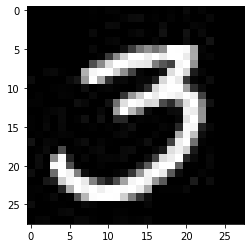

In [13]:
path = 'data/train/3/'+str(np.random.choice(os.listdir('data/train/3')))
print(path)
image = plt.imread(path)
print(image.shape)
plt.imshow(image)
print(image[:,:,2]-image[:,:,0])
'''
We conclude that the grayscale images are save as 3D arrays(with each 2D array repeating 3 times) because of np.imsave function, even though they are supposed to be 1D grayscale images
 '''

In [14]:
image_from_csv = X[99].reshape(28,28) #99 is chosen by me randomly
print(image_from_csv.shape)
image_from_csv = np.expand_dims(image_from_csv, 2)
print(image_from_csv.shape)
image_from_csv = np.repeat(image_from_csv, 3, 2)
print(image_from_csv.shape)
print(image_from_csv[:,:,2]-image_from_csv[:,:,0])
'''
We have found suitable functions to use in preprocessing function of the Test image generator
'''

(28, 28)
(28, 28, 1)
(28, 28, 3)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0

'\nWe have found suitable functions to use in preprocessing function of the Test image generator\n'

In [15]:
'''t1 = time.time()
for i in range(Xt.shape[0]):
    seed = np.random.random()
    img = tf.reshape(Xt[i],(28,28))
    label = Yt[i]
    if seed <= train_test_split:
        plt.imsave('data/test/'+str(label.numpy())+'/img_'+str(i)+'.jpeg', img, vmin=0, vmax = 255, format='jpg' )
    else:
        plt.imsave('data/train/'+str(label.numpy())+'/img_'+str(i)+'.jpeg', img, vmin=0, vmax = 255, format='jpg' )
t2 = time.time()
print("Time required with tf=",t2-t1,'\n')'''

't1 = time.time()\nfor i in range(Xt.shape[0]):\n    seed = np.random.random()\n    img = tf.reshape(Xt[i],(28,28))\n    label = Yt[i]\n    if seed <= train_test_split:\n        plt.imsave(\'data/test/\'+str(label.numpy())+\'/img_\'+str(i)+\'.jpeg\', img, vmin=0, vmax = 255, format=\'jpg\' )\n    else:\n        plt.imsave(\'data/train/\'+str(label.numpy())+\'/img_\'+str(i)+\'.jpeg\', img, vmin=0, vmax = 255, format=\'jpg\' )\nt2 = time.time()\nprint("Time required with tf=",t2-t1,\'\n\')'

# ***Train and Test batch generators***

In [16]:
#hyperparameters
#print(os.listdir('data/test/0'))
#print(os.listdir('data/train/0'))

batch_size = 64

In [17]:
train_gen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True)
train_batches = train_gen.flow_from_directory('data/train',target_size=(28,28),batch_size = batch_size, shuffle = True)

val_gen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True)
val_batches = train_gen.flow_from_directory('data/test',target_size=(28,28),batch_size = batch_size)

Found 33608 images belonging to 10 classes.
Found 8392 images belonging to 10 classes.


In [18]:
validation_steps = val_batches.n//batch_size
steps_per_epoch = train_batches.n//batch_size

# *** Model 1: Reference Model* **

In [19]:
#Model 1

def define_model_1 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2,activation = 'relu')(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same',activation = 'relu')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128,activation='relu')(xin_flatten)
    xout = Dense(10,activation = 'softmax')(xin_dense)
    model = Model(inputs=xin, outputs=xout)
    return model
model_1 = define_model_1()
model_1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0   

In [20]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_acc",
    factor=0.1,
    patience=2,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

from livelossplot import PlotLossesKeras


model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

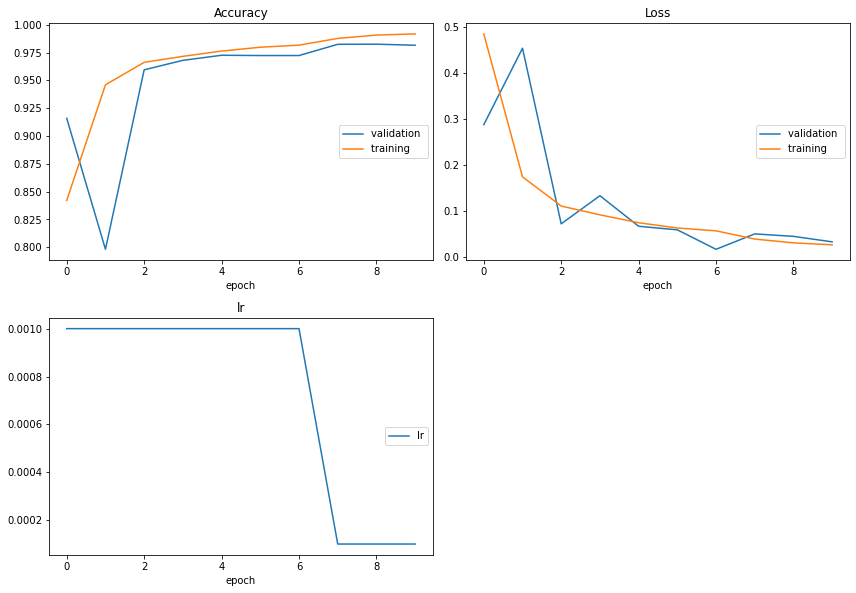

Accuracy
	validation       	 (min:    0.798, max:    0.983, cur:    0.982)
	training         	 (min:    0.842, max:    0.992, cur:    0.992)
Loss
	validation       	 (min:    0.017, max:    0.453, cur:    0.033)
	training         	 (min:    0.027, max:    0.485, cur:    0.027)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)


In [21]:
hist1 = model_1.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

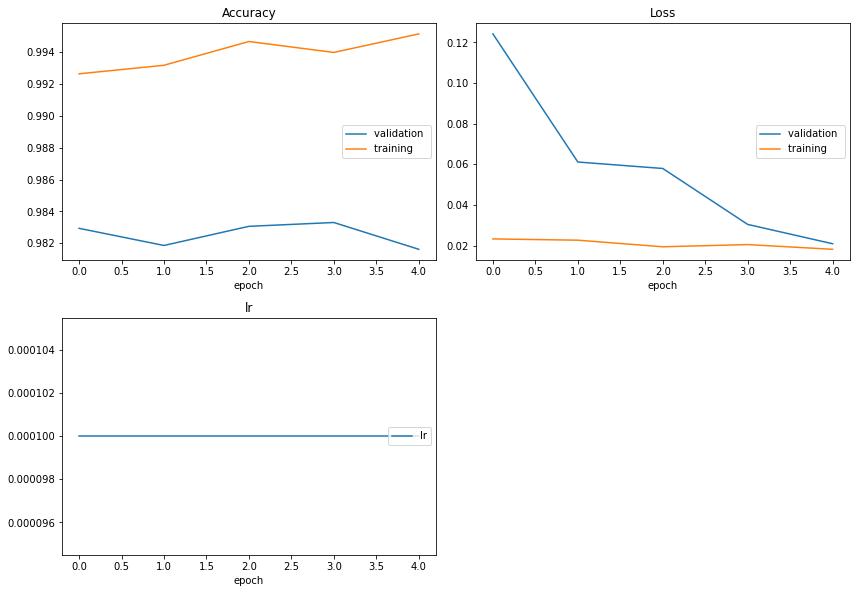

Accuracy
	validation       	 (min:    0.982, max:    0.983, cur:    0.982)
	training         	 (min:    0.993, max:    0.995, cur:    0.995)
Loss
	validation       	 (min:    0.021, max:    0.124, cur:    0.021)
	training         	 (min:    0.018, max:    0.023, cur:    0.018)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


'\nWe observe that the model overfits the training data as we train for more epochs than sufficient\n'

In [22]:
#training for 5 more epochs to check the upcoming pattern
hist1_1 = model_1.fit(x=train_batches,epochs=5, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)
'''
We observe that the model overfits the training data as we train for more epochs than sufficient
'''

In [23]:
model_1.get_layer('flatten_1').output

<tf.Tensor 'flatten_1/Reshape:0' shape=(None, None) dtype=float32>

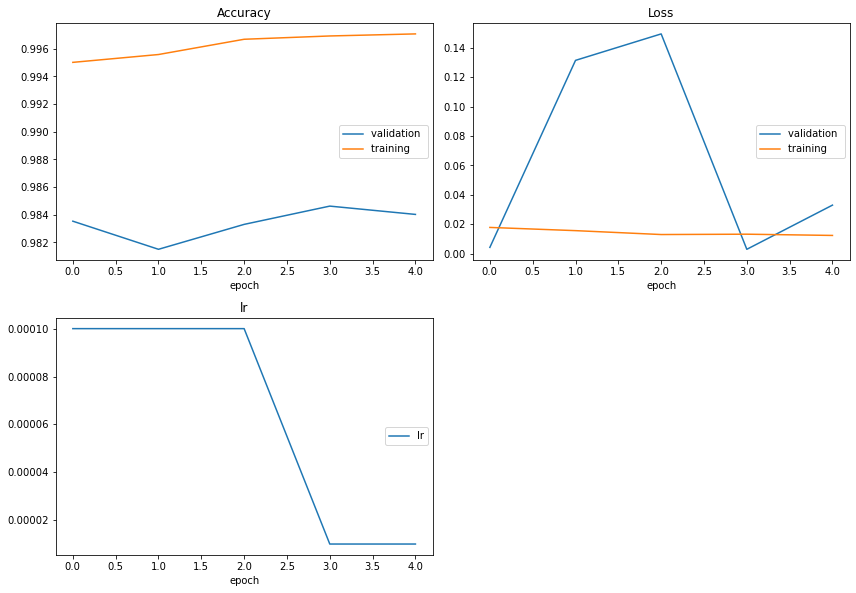

Accuracy
	validation       	 (min:    0.982, max:    0.985, cur:    0.984)
	training         	 (min:    0.995, max:    0.997, cur:    0.997)
Loss
	validation       	 (min:    0.003, max:    0.149, cur:    0.033)
	training         	 (min:    0.012, max:    0.018, cur:    0.012)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


In [24]:
#training for 5 more epochs with lr=0.0001 to check the upcoming pattern

model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['acc'])
hist1_1 = model_1.fit(x=train_batches,epochs=5, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)


In [25]:
#evaluating on test set of Digit Recognizer competition

test = pd.read_csv('../input/digit-recognizer/test.csv')
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


# ***Testing the model on the test.csv file***

In [26]:
def preprocess_test(test):    #converts the test.csv DataFrame in pandas to input for the model
    test = test.iloc[:,:].values
    print(test.shape)
    test = np.reshape(test,(test.shape[0],28,28))
    print(test.shape)
    test = np.expand_dims(test,3)
    print(test.shape)
    test = np.repeat(test, 3, 3)
    print(test.shape)
    return test
test = preprocess_test(test)


(28000, 784)
(28000, 28, 28)
(28000, 28, 28, 1)
(28000, 28, 28, 3)


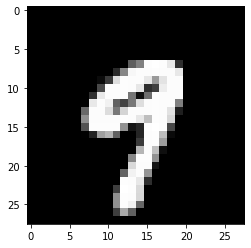

In [27]:
#generating random sample from the test sample
plt.imshow(test[np.random.randint(0,test.shape[0])])

In [28]:
print(test[3,:,:,0] - test[3,:,:,1])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [29]:
res = model_1.predict(test)

In [30]:
print(res.shape)

(28000, 10)


In [31]:
test_pred = pd.DataFrame(res) 
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1)) 
test_pred.index.name = 'ImageId' 
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index() 
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [32]:
test_pred.to_csv('res.csv', index = False)

# ***Model 2: Model 1 but LR of Adam optimizer is set to 0.1 (from 0.001)***

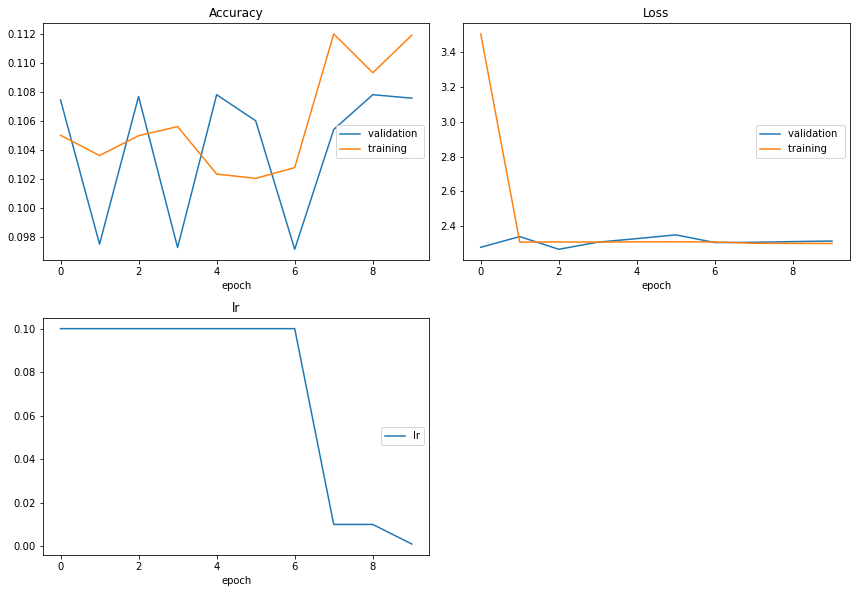

Accuracy
	validation       	 (min:    0.097, max:    0.108, cur:    0.108)
	training         	 (min:    0.102, max:    0.112, cur:    0.112)
Loss
	validation       	 (min:    2.268, max:    2.351, cur:    2.315)
	training         	 (min:    2.301, max:    3.504, cur:    2.301)
lr
	lr               	 (min:    0.001, max:    0.100, cur:    0.001)


In [33]:
def define_model_2 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2,activation = 'relu')(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same',activation = 'relu')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128,activation='relu')(xin_flatten)
    xout = Dense(10,activation = 'softmax')(xin_dense)
    model = Model(inputs=xin, outputs=xout)
    return model
model_2 = define_model_2()
model_2.summary()
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['acc'])
hist2 = model_2.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

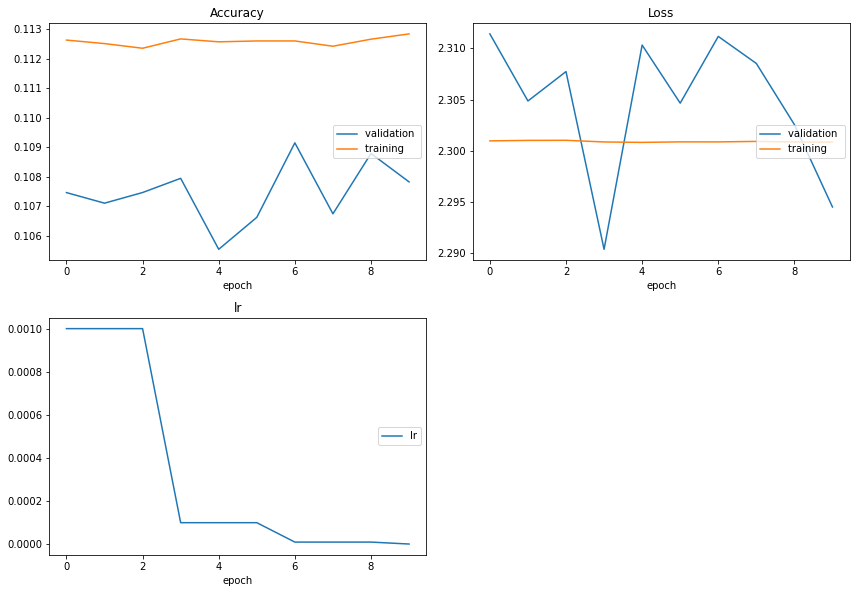

Accuracy
	validation       	 (min:    0.106, max:    0.109, cur:    0.108)
	training         	 (min:    0.112, max:    0.113, cur:    0.113)
Loss
	validation       	 (min:    2.290, max:    2.311, cur:    2.295)
	training         	 (min:    2.301, max:    2.301, cur:    2.301)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)


In [34]:
#training for 10 more epochs to check if Learning rate scheduler works or not
model_2.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

In [35]:
'''
Due to very high learning rate, the gradient descent actually diverged the weights from 
the optimal value
'''

'\nDue to very high learning rate, the gradient descent actually diverged the weights from \nthe optimal value\n'

# *Model 3: Model 1 but lr is set to 0.01(from 0.001)*

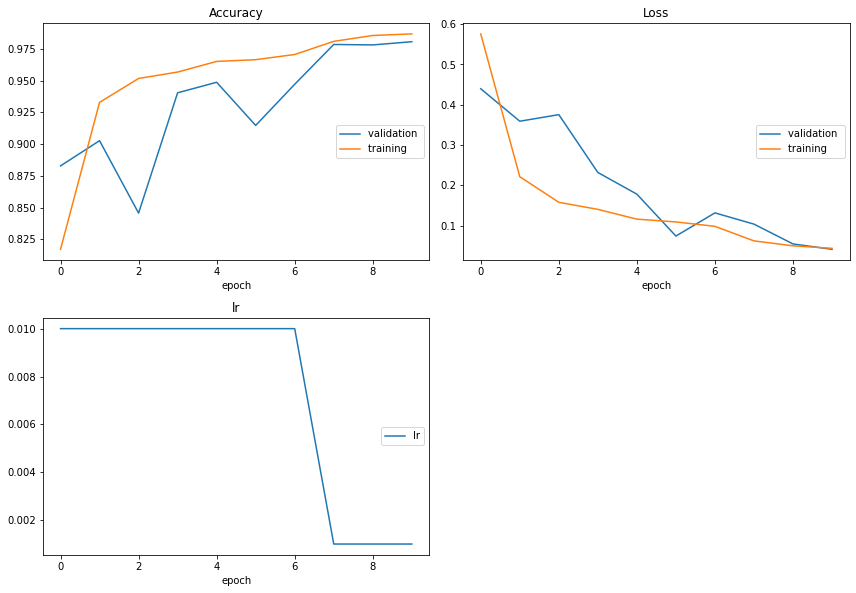

Accuracy
	validation       	 (min:    0.846, max:    0.981, cur:    0.981)
	training         	 (min:    0.817, max:    0.987, cur:    0.987)
Loss
	validation       	 (min:    0.041, max:    0.440, cur:    0.041)
	training         	 (min:    0.044, max:    0.576, cur:    0.044)
lr
	lr               	 (min:    0.001, max:    0.010, cur:    0.001)


In [36]:
def define_model_3 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2,activation = 'relu')(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same',activation = 'relu')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128,activation='relu')(xin_flatten)
    xout = Dense(10,activation = 'softmax')(xin_dense)
    model = Model(inputs=xin, outputs=xout)
    return model
model_3 = define_model_3()
model_3.summary()
model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['acc'])
hist3 = model_3.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

# *Model 4: Model 1 but without using activations in Conv. layers*

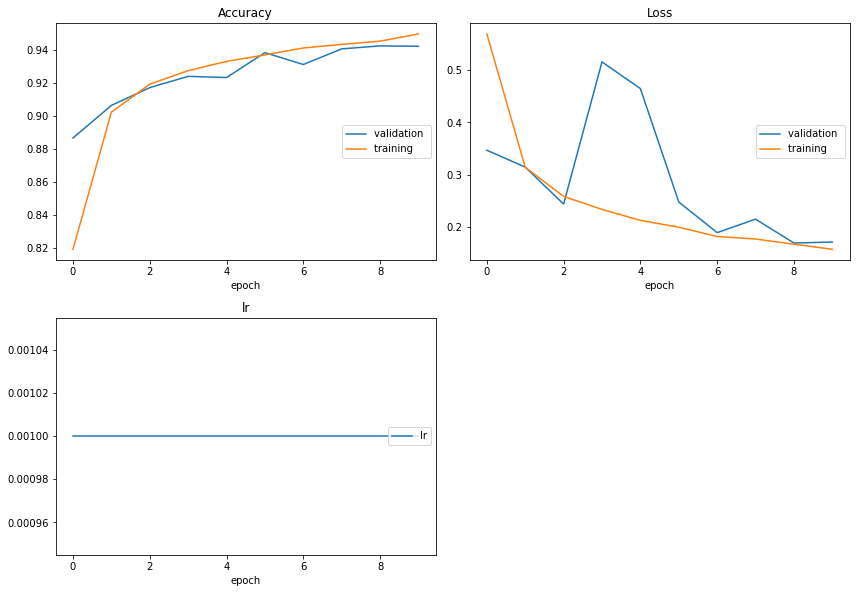

Accuracy
	validation       	 (min:    0.887, max:    0.943, cur:    0.942)
	training         	 (min:    0.819, max:    0.950, cur:    0.950)
Loss
	validation       	 (min:    0.170, max:    0.516, cur:    0.172)
	training         	 (min:    0.158, max:    0.569, cur:    0.158)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)


In [37]:
def define_model_4 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2)(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128,activation='relu')(xin_flatten)
    xout = Dense(10,activation = 'softmax')(xin_dense)
    model = Model(inputs=xin, outputs=xout)
    return model
model_4 = define_model_4()
model_4.summary()
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
hist4 = model_4.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

# *Model 5: Model 1 but without using activations in all layers except the final Softmax activation*

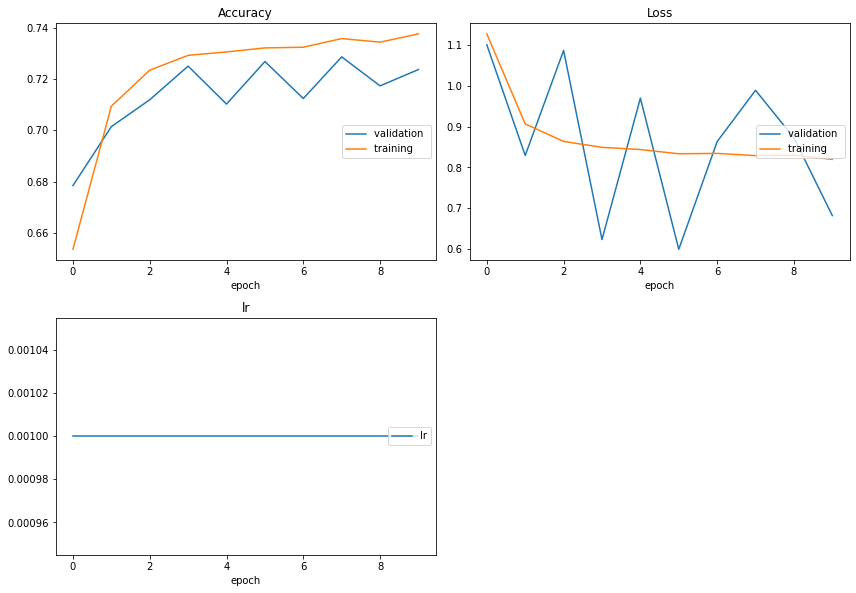

Accuracy
	validation       	 (min:    0.679, max:    0.729, cur:    0.724)
	training         	 (min:    0.654, max:    0.738, cur:    0.738)
Loss
	validation       	 (min:    0.599, max:    1.101, cur:    0.682)
	training         	 (min:    0.820, max:    1.128, cur:    0.820)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)


In [38]:
def define_model_5 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2)(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128)(xin_flatten)
    xout = Dense(10,activation = 'softmax')(xin_dense)
    model = Model(inputs=xin, outputs=xout)
    return model
model_5 = define_model_5()
model_5.summary()
model_5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
hist5 = model_5.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

# ***Model 6: Model 1 but one with one extra Dense layer of 64 neurons***

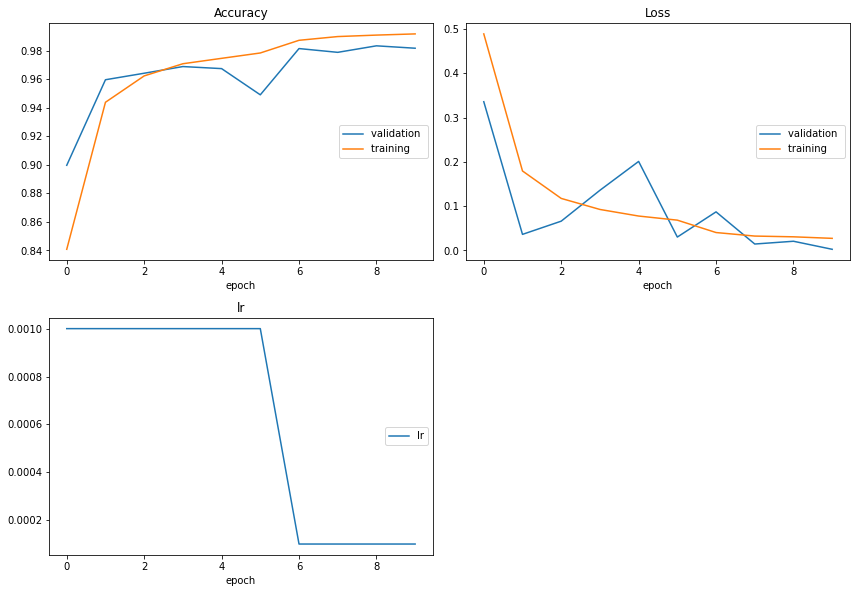

Accuracy
	validation       	 (min:    0.900, max:    0.983, cur:    0.982)
	training         	 (min:    0.841, max:    0.992, cur:    0.992)
Loss
	validation       	 (min:    0.003, max:    0.336, cur:    0.003)
	training         	 (min:    0.027, max:    0.489, cur:    0.027)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)


In [39]:

def define_model_6 ():  #xin is a batch of inputs from Digit Recogniser Dataset
    xin = Input((28,28,3),(None,28,28,3))
    xin_norm = BatchNormalization()(xin)
    #Layer 1
    xin_conv_1 = Conv2D(filters = 64, kernel_size = (3,3),strides= 2,activation = 'relu')(xin_norm)
    bn2 = BatchNormalization()(xin_conv_1)
    #Layer 2
    xin_conv_2 = Conv2D(filters = 32, kernel_size = (3,3),strides= 2,padding='same',activation = 'relu')(bn2)
    bn3 = BatchNormalization()(xin_conv_2)
    xin_flatten = Flatten()(bn3)
    xin_dense = Dense(128,activation='relu')(xin_flatten)
    xin_interm = Dense(64,activation='relu')(xin_dense)
    xout = Dense(10,activation = 'softmax')(xin_interm)
    model = Model(inputs=xin, outputs=xout)
    return model
model_6 = define_model_6()
model_6.summary()
model_6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
hist6 = model_6.fit(x=train_batches,epochs=10, callbacks=[lr_scheduler,PlotLossesKeras()], 
            validation_data = val_batches,steps_per_epoch = steps_per_epoch, validation_steps = validation_steps)

In [40]:
print(hist6.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


# ***Model 7: Model 1 but with Dropout***

# ***Model 8: Model 1 but with Focal loss***